In [4]:
#Spotify song popularity year wise prediction
#group 24
#Siriwardhana T.D.R.D   EG/2020/4219
#Rishinath    K.        EG/2020/4165

In [5]:
# @title Import Libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [6]:
# @title Load data
df = pd.read_csv('top10s.csv',encoding='ISO-8859-1')

df.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [7]:
df.shape

(603, 15)

In [8]:
df.isna().sum()

Unnamed: 0    0
title         0
artist        0
top genre     0
year          0
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
pop           0
dtype: int64

In [9]:
df.columns

Index(['Unnamed: 0', 'title', 'artist', 'top genre', 'year', 'bpm', 'nrgy',
       'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop'],
      dtype='object')

In [10]:
print(df['title'].nunique())
print(df['artist'].nunique())
print(df['top genre'].nunique())

584
184
50


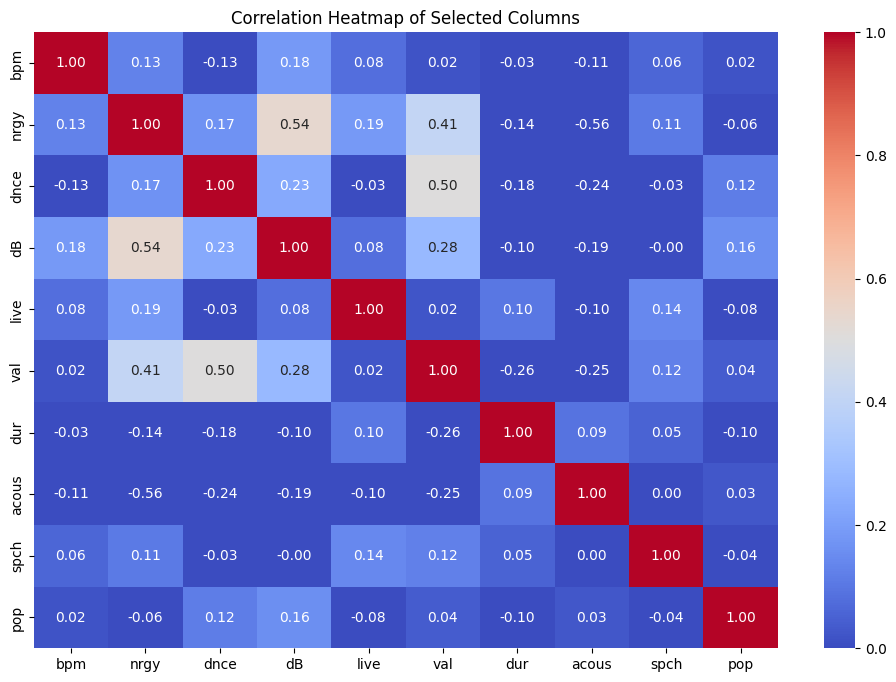

In [11]:
# @title checking the correlation
selected_columns = ['bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop']

# Extracting the selected columns
df_selected = df[selected_columns]

# Calculating the correlation matrix
correlation_matrix = df_selected.corr()

# Creating a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=0, vmax=1)
plt.title('Correlation Heatmap of Selected Columns')
plt.show()

In [12]:
# @title Checking for the the outliers

popularity_by_year = df.groupby('year')['pop'].mean().reset_index()

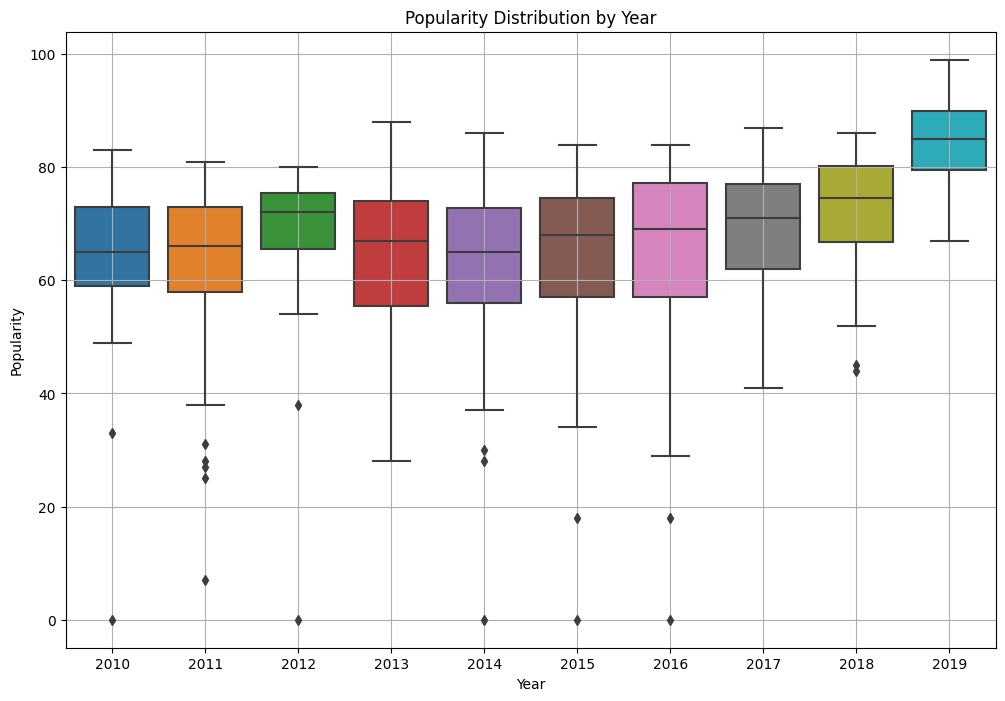

In [13]:
#plot the data

plt.figure(figsize=(12, 8))
sns.boxplot(x='year', y='pop', data=df)
plt.title('Popularity Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

In [14]:
#statistics of the dataset

popularity_stats_by_year = df.groupby('year')['pop'].describe()
print(popularity_stats_by_year)
df.head()

      count       mean        std   min    25%   50%    75%   max
year                                                             
2010   51.0  64.254902  13.227007   0.0  59.00  65.0  73.00  83.0
2011   53.0  61.867925  16.058831   7.0  58.00  66.0  73.00  81.0
2012   35.0  67.771429  14.528037   0.0  65.50  72.0  75.50  80.0
2013   71.0  63.985915  12.864673  28.0  55.50  67.0  74.00  88.0
2014   58.0  62.706897  15.545077   0.0  56.00  65.0  72.75  86.0
2015   95.0  64.568421  14.352443   0.0  57.00  68.0  74.50  84.0
2016   80.0  64.162500  16.237512   0.0  57.00  69.0  77.25  84.0
2017   65.0  69.015385  10.982219  41.0  62.00  71.0  77.00  87.0
2018   64.0  72.437500   9.870390  44.0  66.75  74.5  80.25  86.0
2019   31.0  84.354839   8.292761  67.0  79.50  85.0  90.00  99.0


,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [15]:
# way to remove the outliers just by changing the range

for i in range(0):
    Q1 = df['pop'].quantile(0.25)
    Q3 = df['pop'].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df['pop'] >= lower_bound) & (df['pop'] <= upper_bound)]
    df.head()

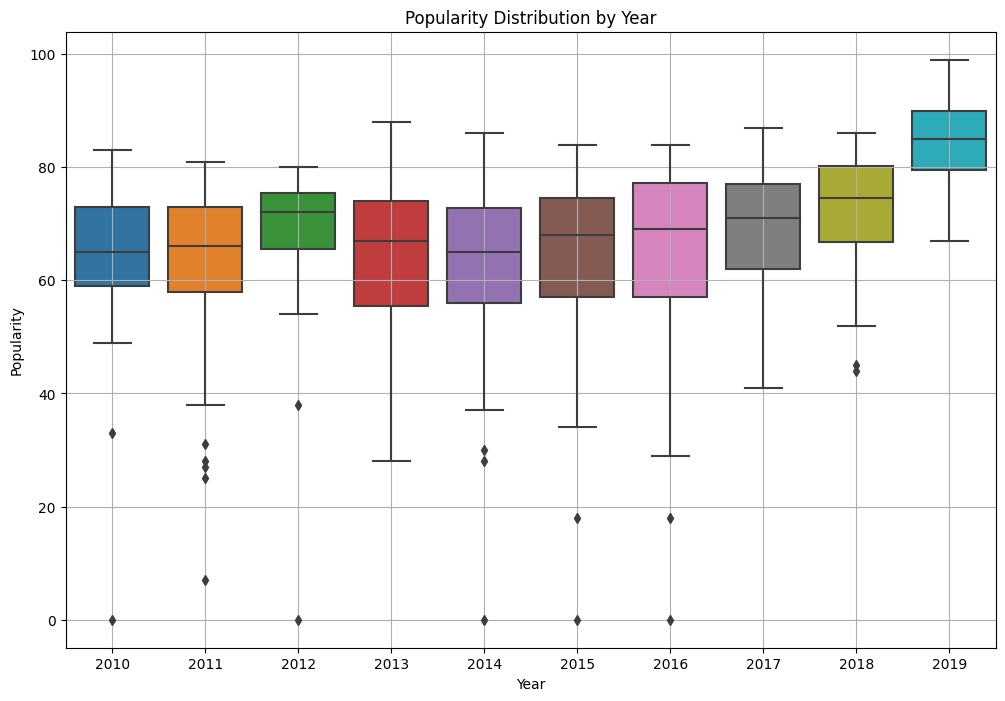

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [16]:
#if we remove the outliers, the codeblock for again plotting the data without outliers
plt.figure(figsize=(12, 8))
sns.boxplot(x='year', y='pop', data=df)
plt.title('Popularity Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()
df.head()

In [17]:
#statistics just after removing the outliers

popularity_stats_no_outliers = df.groupby('year')['pop'].describe()
print(popularity_stats_no_outliers)

      count       mean        std   min    25%   50%    75%   max
year                                                             
2010   51.0  64.254902  13.227007   0.0  59.00  65.0  73.00  83.0
2011   53.0  61.867925  16.058831   7.0  58.00  66.0  73.00  81.0
2012   35.0  67.771429  14.528037   0.0  65.50  72.0  75.50  80.0
2013   71.0  63.985915  12.864673  28.0  55.50  67.0  74.00  88.0
2014   58.0  62.706897  15.545077   0.0  56.00  65.0  72.75  86.0
2015   95.0  64.568421  14.352443   0.0  57.00  68.0  74.50  84.0
2016   80.0  64.162500  16.237512   0.0  57.00  69.0  77.25  84.0
2017   65.0  69.015385  10.982219  41.0  62.00  71.0  77.00  87.0
2018   64.0  72.437500   9.870390  44.0  66.75  74.5  80.25  86.0
2019   31.0  84.354839   8.292761  67.0  79.50  85.0  90.00  99.0


In [18]:
# @title Encoding the string features

from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Assuming df is your DataFrame
vectorizer = TfidfVectorizer()

# Combine text from 'title', 'artist', and 'top genre' into a single column
#combined_text = df['title'] + ' ' + df['artist'] + ' ' + df['top genre']
combined_text = df['top genre']


# Transform the combined text using the vectorizer
text_matrix = vectorizer.fit_transform(combined_text)

# Extract feature names
feature_names = vectorizer.get_feature_names_out()

# Create DataFrames for each text column
#title_matrix = pd.DataFrame(vectorizer.transform(df['title']).toarray(), columns=[f'title_{name}' for name in feature_names])
#artist_matrix = pd.DataFrame(vectorizer.transform(df['artist']).toarray(), columns=[f'artist_{name}' for name in feature_names])
top_genre_matrix = pd.DataFrame(vectorizer.transform(df['top genre']).toarray(), columns=[f'top_genre_{name}' for name in feature_names])

# Concatenate the matrices with the original DataFrame
#df = pd.concat([df, title_matrix, artist_matrix, top_genre_matrix], axis=1)
df = pd.concat([df, top_genre_matrix], axis=1)
#df = pd.concat([df, title_matrix, top_genre_matrix], axis=1)


In [19]:
# @title Classified the target variable

# Calculate the median popularity for each year
median_popularity_by_year = df.groupby('year')['pop'].median()

# Create labels based on median popularity values
labels = ['Miss', 'Hit']

# Assign labels to each year based on median popularity
df['pop_classification'] = df['year'].map(median_popularity_by_year)
df['pop_classification'] = pd.cut(df['pop_classification'], bins=[df['pop_classification'].min(), df['pop_classification'].median(), df['pop_classification'].max()], labels=labels, right=False)

# Display the count of each label
classification_counts = df['pop_classification'].value_counts()
print(classification_counts)

# Display statistical summary of popularity for each year without outliers
popularity_stats_no_outliers = df.groupby('year')['pop'].describe()
print(popularity_stats_no_outliers)

Hit     339
Miss    233
Name: pop_classification, dtype: int64
      count       mean        std   min    25%   50%    75%   max
year                                                             
2010   51.0  64.254902  13.227007   0.0  59.00  65.0  73.00  83.0
2011   53.0  61.867925  16.058831   7.0  58.00  66.0  73.00  81.0
2012   35.0  67.771429  14.528037   0.0  65.50  72.0  75.50  80.0
2013   71.0  63.985915  12.864673  28.0  55.50  67.0  74.00  88.0
2014   58.0  62.706897  15.545077   0.0  56.00  65.0  72.75  86.0
2015   95.0  64.568421  14.352443   0.0  57.00  68.0  74.50  84.0
2016   80.0  64.162500  16.237512   0.0  57.00  69.0  77.25  84.0
2017   65.0  69.015385  10.982219  41.0  62.00  71.0  77.00  87.0
2018   64.0  72.437500   9.870390  44.0  66.75  74.5  80.25  86.0
2019   31.0  84.354839   8.292761  67.0  79.50  85.0  90.00  99.0


In [20]:
df.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,...,top_genre_rap,top_genre_rock,top_genre_room,top_genre_singer,top_genre_songwriter,top_genre_soul,top_genre_trap,top_genre_tropical,top_genre_wave,pop_classification
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Miss
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Miss
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Miss
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Miss
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Miss


In [21]:
#plt.scatter(df['Unnamed: 0'],df['pop_classification'])
df.isna().sum()

Unnamed: 0             0
title                  0
artist                 0
top genre              0
year                   0
                      ..
top_genre_soul         0
top_genre_trap         0
top_genre_tropical     0
top_genre_wave         0
pop_classification    31
Length: 71, dtype: int64

In [22]:
df = df.dropna()
df.isna().sum()

Unnamed: 0            0
title                 0
artist                0
top genre             0
year                  0
                     ..
top_genre_soul        0
top_genre_trap        0
top_genre_tropical    0
top_genre_wave        0
pop_classification    0
Length: 71, dtype: int64

In [23]:
#drop the unwanted columns

df=df.drop('Unnamed: 0',axis=1)
df=df.drop('title',axis=1)
df=df.drop('artist',axis=1)
df=df.drop('top genre',axis=1)
df=df.drop('pop',axis=1)

In [24]:
df.head()

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,...,top_genre_rap,top_genre_rock,top_genre_room,top_genre_singer,top_genre_songwriter,top_genre_soul,top_genre_trap,top_genre_tropical,top_genre_wave,pop_classification
0,2010,97,89,67,-4,8,80,217,19,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Miss
1,2010,87,93,75,-5,52,64,263,24,23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Miss
2,2010,120,84,76,-3,29,71,200,10,14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Miss
3,2010,119,92,70,-4,8,71,295,0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Miss
4,2010,109,84,64,-5,9,43,221,2,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Miss


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
#feature engineering

X = df.drop(['pop_classification'], axis=1)
y = df['pop_classification']

In [27]:
# splitting the training and test datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
#Normalizing the data

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
def HyperPara(c,g):
    # Create and train the SVM classifier
    #svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
    # Example with additional hyperparameter (gamma) for RBF kernel
    svm_classifier = SVC(kernel='rbf', C=c, gamma=g, random_state=42)
    svm_classifier.fit(X_train_scaled, y_train)

    # Make predictions on the test set
    predictions = svm_classifier.predict(X_test_scaled)
    predictions = svm_classifier.predict(X_test_scaled)

    # Evaluate the classifier
    return [predictions,svm_classifier]

In [30]:
#Hyperparameter optimization

global predictions
global svm_classifier
accuracy=0
G=[0.6,0.7,0.8,0.9,1.0]
C=[0.1,0.2,0.3,0.4,0.5]
AC=[]
GM=0
CO=0
for i in G:
    for j in C:
        H = HyperPara(i,j)
        predict =H[0]
        ac= accuracy_score(y_test, predict)
        AC.append(ac)
        if ac>accuracy:
            accuracy=ac
            GM=i
            CO=j
            predictions = predict
            svm_classifier = H[1]
print(AC)
print(GM,CO)

[0.8347826086956521, 0.808695652173913, 0.7478260869565218, 0.7304347826086957, 0.6782608695652174, 0.8521739130434782, 0.8260869565217391, 0.8, 0.7478260869565218, 0.7043478260869566, 0.8434782608695652, 0.8434782608695652, 0.7913043478260869, 0.7565217391304347, 0.7217391304347827, 0.8521739130434782, 0.8521739130434782, 0.808695652173913, 0.7652173913043478, 0.7391304347826086, 0.8608695652173913, 0.8695652173913043, 0.8260869565217391, 0.782608695652174, 0.7304347826086957]
1.0 0.2


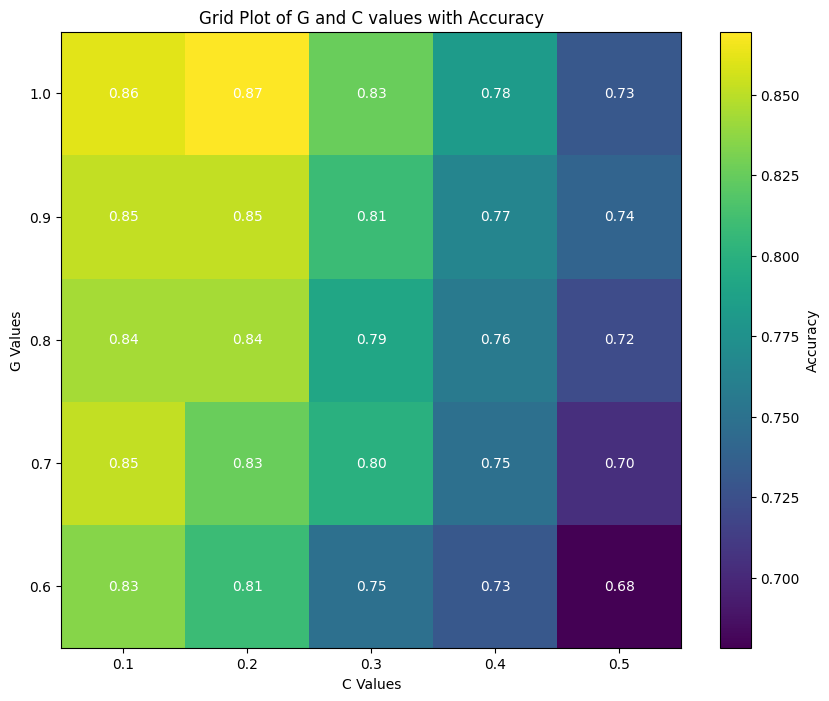

In [31]:
# @title accuracy grid for hyperparameters

# Assuming AC is a 1D array of accuracy values, and G, C are 1D arrays of parameter values
AC_reshaped = np.array(AC).reshape(len(G), len(C))

# Creating a grid plot
plt.figure(figsize=(10, 8))
heatmap = plt.pcolor(AC_reshaped, cmap='viridis')

# Adding color bar
cbar = plt.colorbar(heatmap, label='Accuracy')

# Adding G and C labels
plt.xticks(np.arange(len(C)) + 0.5, C)
plt.yticks(np.arange(len(G)) + 0.5, G)
plt.xlabel('C Values')
plt.ylabel('G Values')

# Adding text annotations in each cell
for i in range(len(G)):
    for j in range(len(C)):
        plt.text(j + 0.5, i + 0.5, f'{AC_reshaped[i, j]:.2f}', ha='center', va='center', color='w')

plt.title('Grid Plot of G and C values with Accuracy')
plt.show()


[0.1, 0.2, 0.3, 0.4, 0.5] [0.6, 0.7, 0.8, 0.9, 1.0]
Accuracy: 0.8695652173913043
Confusion Matrix:
[[58  4]
 [11 42]]
Classification Report:
              precision    recall  f1-score   support

         Hit       0.84      0.94      0.89        62
        Miss       0.91      0.79      0.85        53

    accuracy                           0.87       115
   macro avg       0.88      0.86      0.87       115
weighted avg       0.87      0.87      0.87       115



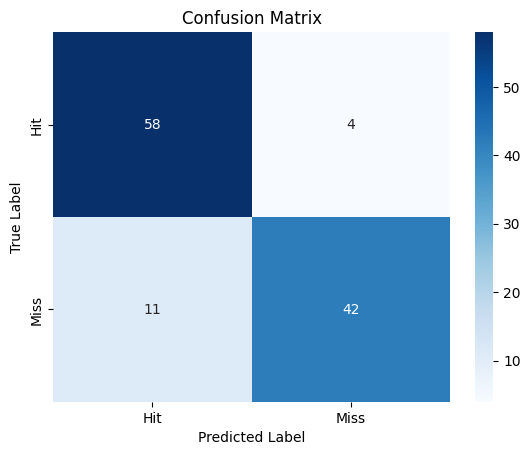

In [32]:
#visualize the output

conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

# Display evaluation metrics
print(C,G)
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

# Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=svm_classifier.classes_, yticklabels=svm_classifier.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [33]:
#Hyperparameter optimization for training data

def Train_HyperPara(c,g):
    # Create and train the SVM classifier
    #svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
    # Example with additional hyperparameter (gamma) for RBF kernel
    svm_classifier = SVC(kernel='rbf', C=c, gamma=g, random_state=42)
    svm_classifier.fit(X_train_scaled, y_train)

    # Make predictions on the test set
    predictions = svm_classifier.predict(X_train_scaled)
    predictions = svm_classifier.predict(X_train_scaled)

    # Evaluate the classifier
    return [predictions,svm_classifier]

In [34]:
global train_predictions
global train_svm_classifier
train_accuracy=0
train_G=[0.6,0.7,0.8,0.9,1.0]
train_C=[0.1,0.2,0.3,0.4,0.5]
train_AC=[]
train_GM=0
train_CO=0
for i in train_G:
    for j in train_C:
        train_H = Train_HyperPara(i,j)
        train_predict =train_H[0]
        train_ac= accuracy_score(y_train, train_predict)
        train_AC.append(train_ac)
        if train_ac>train_accuracy:
            train_accuracy=train_ac
            train_GM=i
            train_CO=j
            train_predictions = train_predict
            train_svm_classifier = train_H[1]
print(train_AC)
print(train_GM,train_CO)

[0.9080962800875274, 0.936542669584245, 0.9540481400437637, 0.9606126914660832, 0.9715536105032823, 0.9212253829321663, 0.9452954048140044, 0.9606126914660832, 0.9715536105032823, 0.9781181619256017, 0.9277899343544858, 0.9452954048140044, 0.962800875273523, 0.9715536105032823, 0.9824945295404814, 0.9343544857768052, 0.9474835886214442, 0.9649890590809628, 0.975929978118162, 0.9846827133479212, 0.9343544857768052, 0.9474835886214442, 0.962800875273523, 0.9803063457330415, 0.986870897155361]
1.0 0.5


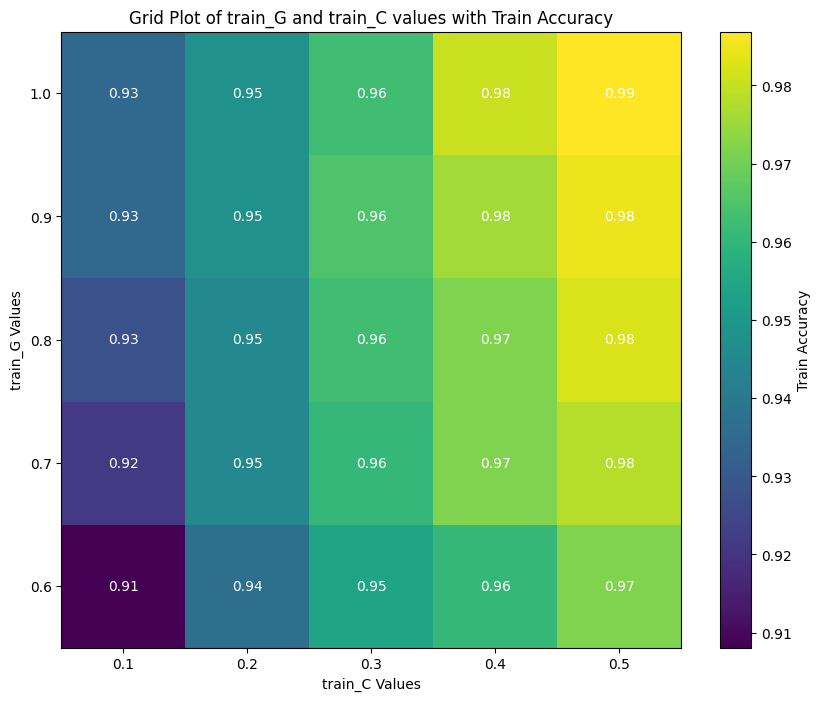

In [35]:
# @title accuracy grid for hyperparameters

# Assuming AC is a 1D array of accuracy values, and G, C are 1D arrays of parameter values
train_AC_reshaped = np.array(train_AC).reshape(len(train_G), len(train_C))

# Creating a grid plot
plt.figure(figsize=(10, 8))
heatmap = plt.pcolor(train_AC_reshaped, cmap='viridis')

# Adding color bar
train_cbar = plt.colorbar(heatmap, label='Train Accuracy')

# Adding G and C labels
plt.xticks(np.arange(len(train_C)) + 0.5, C)
plt.yticks(np.arange(len(train_G)) + 0.5, G)
plt.xlabel('train_C Values')
plt.ylabel('train_G Values')

# Adding text annotations in each cell
for i in range(len(train_G)):
    for j in range(len(train_C)):
        plt.text(j + 0.5, i + 0.5, f'{train_AC_reshaped[i, j]:.2f}', ha='center', va='center', color='w')

plt.title('Grid Plot of train_G and train_C values with Train Accuracy')
plt.show()

[0.1, 0.2, 0.3, 0.4, 0.5] [0.6, 0.7, 0.8, 0.9, 1.0]
Train Accuracy: 0.986870897155361
Confusion Matrix:
[[274   3]
 [  3 177]]
Classification Report:
              precision    recall  f1-score   support

         Hit       0.99      0.99      0.99       277
        Miss       0.98      0.98      0.98       180

    accuracy                           0.99       457
   macro avg       0.99      0.99      0.99       457
weighted avg       0.99      0.99      0.99       457



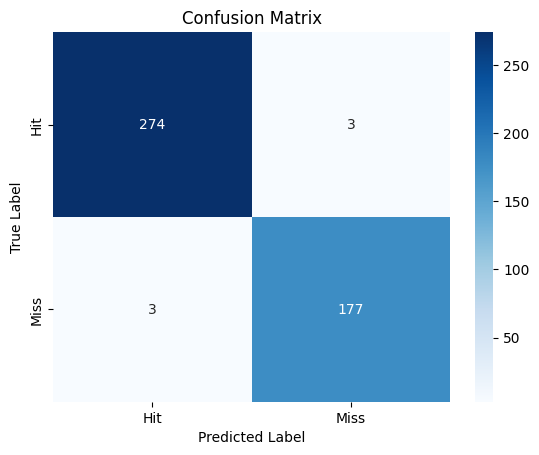

In [36]:
train_conf_matrix = confusion_matrix(y_train, train_predictions)
train_classification_rep = classification_report(y_train, train_predictions)

# Display evaluation metrics
print(train_C,train_G)
print(f"Train Accuracy: {train_accuracy}")
print("Confusion Matrix:")
print(train_conf_matrix)
print("Classification Report:")
print(train_classification_rep)

# Visualize the confusion matrix
sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=train_svm_classifier.classes_, yticklabels=train_svm_classifier.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()